In [1]:
import pandas as pd
reports = {}
for week in list(range(84,89)):
    reports_dir = f'reports/{week}'
    filename = '__ethereum_0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0.json'
    reports[week] = pd.read_json(reports_dir+'/'+filename, orient='index')
    reports[week].columns = [week]

In [2]:
merge = pd.DataFrame()
for week in list(range(84,89)):
    merge = merge.join(reports[week], how='outer')
merge

,84,85,86,87,88
0x00861fEFCfEF0a542b0a6c90ce1eE575e257A6C7,0.000015,0.000012,0.000013,0.000014,0.000012
0x013fB7fEf023646bf4E76cB756206A742f31813e,0.000050,0.000039,0.000045,0.000045,0.000039
0x019c8F08C5D93d59311C067A42f966420B19aB03,0.000202,0.000157,0.000182,0.000185,0.000160
0x0412ED8438b5fAE246606909ef8ba365F9103783,0.024806,0.019296,0.022319,0.022711,0.019641
0x0444538cDFEd27287B98888DD02e691A244642a2,0.000025,0.000019,0.000022,0.000023,0.000020
...,...,...,...,...,...
0xee1e33029C2104993E4536Be502990284e77080d,0.025289,0.019671,0.022753,0.023153,0.020023
0xf56717F28cB611a08DE9AeD558d2a9574597B05f,0.003125,0.002431,0.002811,0.002861,0.002474
0xf6c239EBa307Cb2E054fa696664f2170b9219D98,0.000434,NaN,NaN,NaN,NaN
0xfF052381092420B7F24cc97FDEd9C0c17b2cbbB9,0.051612,0.040147,0.046437,0.047253,0.040865


In [3]:
merge.fillna(0).sum()

84    5.228465
85    5.459192
86    6.341634
87    6.114761
88    5.216811
dtype: float64

In [4]:
aggregate = merge.fillna(0).sum(axis=1)
aggregate

0x00861fEFCfEF0a542b0a6c90ce1eE575e257A6C7    0.000065
0x013fB7fEf023646bf4E76cB756206A742f31813e    0.000218
0x019c8F08C5D93d59311C067A42f966420B19aB03    0.000886
0x0412ED8438b5fAE246606909ef8ba365F9103783    0.108772
0x0444538cDFEd27287B98888DD02e691A244642a2    0.000109
                                                ...   
0xee1e33029C2104993E4536Be502990284e77080d    0.110890
0xf56717F28cB611a08DE9AeD558d2a9574597B05f    0.013702
0xf6c239EBa307Cb2E054fa696664f2170b9219D98    0.000434
0xfF052381092420B7F24cc97FDEd9C0c17b2cbbB9    0.226314
0xfbaBD7A2f65E7EFd4e7E9fa4485ACC3c9cac27ad    0.000453
Length: 221, dtype: float64

<AxesSubplot:>

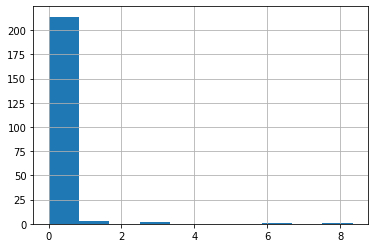

In [5]:
aggregate.hist()

<AxesSubplot:>

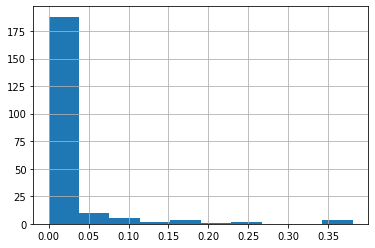

In [6]:
aggregate[aggregate<1].hist()

In [7]:
import json
precision = 7
export_data = aggregate[aggregate >= 1/10**(precision)]
export = export_data.apply(lambda x: format(x, f'.{precision}f'))
export_json = export.to_json()
parsed_export = json.loads(export_json)
with open('reports/wsteth_refund.json', "w") as write_file:
    json.dump(parsed_export, write_file, indent=4)

In [8]:
export_data.describe()

count    2.210000e+02
mean     1.283297e-01
std      7.509813e-01
min      1.000000e-07
25%      4.345300e-04
50%      2.383950e-03
75%      1.091058e-02
max      8.344051e+00
dtype: float64

In [9]:
export_data[export_data>0.01].sort_values()

0xe4C5557a1F859874D5e124747eF5881a449f9712    0.010056
0xa50D7C035a2c4997A75186AD24c37FEcfB19737D    0.010798
0xA3cb7D24b9cB850CF22240043d59bf8E5a76CA61    0.010868
0x97E8cd7ba76aaAA391B9C31B387FCb3b1cf6F850    0.010911
0x37e46caEfEF61D30E680cf754998B4A39e5d8325    0.011459
0x32b487B44f4e7c6485209DbAB4e985Bea8dC0b06    0.012174
0x6D64a7F2C03DF595B309bC7f7900779aFC17d484    0.013035
0x241D6DF6B7C79556460Ab691Ed463781d9873f6a    0.013058
0x8944f9a71b356B55614AA91C59DE555CB673174B    0.013118
0xea3f89A52c2bD79D6182DDC2A531069c2079e782    0.013588
0xf56717F28cB611a08DE9AeD558d2a9574597B05f    0.013702
0x6F1Dde2EFAe685Bed35052360d08CB2E2EC2E295    0.013938
0x4d73EF089CD9B59405eb303e08B76a4e8da3a1C9    0.014168
0xcC15F837dBf16d9d7f311a7Ce19f495893497dd1    0.016324
0x156daF376cfbDD938c470a227508B0ba022C998F    0.016521
0xDf2b2c1DF64D58839320a07907d4181F336A737e    0.017494
0x865f529F429Bd2500260F7A5A2530dC2e205f2B8    0.021587
0x618f2d5932b4d29bda43A96Be1eEF390E1916e24    0.021776
0x2c1EFDC1